<a href="https://colab.research.google.com/github/BongGuenJun/ML-2023/blob/main/%EB%8B%B9%EB%87%A8%EB%B3%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret -q 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

sns.set_style("whitegrid")

set_matplotlib_formats('svg')
plt.rcParams['axes.edgecolor'] = 'black'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info


<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

In [ ]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
len(df.loc[df['smoking_history'] == 'No Info'])
df.loc[df['smoking_history'] == 'No Info'].shape[0]

35816

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [ ]:
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,-1,27.32,6.2,90,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
y=df.iloc[:,8]
print(y.head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: diabetes, dtype: int64


In [ ]:
x=df.drop('diabetes', axis = 1) 

normalization_x=(x-x.mean())/x.std()
x=normalization_x

print(x.head(10))

     gender       age  hypertension  heart_disease  smoking_history       bmi  \
0 -0.841043  1.692695     -0.284438       4.936354        -0.001170 -0.321054   
1 -0.841043  0.538004     -0.284438      -0.202577        -1.009632 -0.000116   
2  1.187228 -0.616688     -0.284438      -0.202577        -0.001170 -0.000116   
3 -0.841043 -0.261398     -0.284438      -0.202577         2.015754 -0.583229   
4  1.187228  1.515050      3.515669       4.936354         2.015754 -1.081965   
5 -0.841043 -0.971977     -0.284438      -0.202577        -0.001170 -0.000116   
6 -0.841043  0.093892     -0.284438      -0.202577        -0.001170 -1.207026   
7 -0.841043  1.648284     -0.284438      -0.202577        -1.009632 -0.521452   
8  1.187228  0.005069     -0.284438      -0.202577        -0.001170  0.952153   
9 -0.841043 -0.439043     -0.284438      -0.202577        -0.001170 -0.000116   

   HbA1c_level  blood_glucose_level  
0     1.001701             0.047704  
1     1.001701            -1.426

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777,stratify=y) 

print(y_train.value_counts())
print(y_test.value_counts())
print(x_train.value_counts())
print(x_test.value_counts())

0    64050
1     5950
Name: diabetes, dtype: int64
0    27450
1     2550
Name: diabetes, dtype: int64
gender     age       hypertension  heart_disease  smoking_history  bmi        HbA1c_level  blood_glucose_level
-0.841043  1.692695  -0.284438     -0.202577      -1.009632        -0.000116  -1.426681    -1.303377              7
                                                                               0.908301     0.514441              7
                                                                              -1.426681     0.539006              6
                                                                               1.001701    -0.296208              5
                                                                              -0.679486    -0.296208              5
                                                                                                                 ..
           0.271537  -0.284438     -0.202577       1.007292         0.418762  -1.426681    

In [ ]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
x_train = stand.fit_transform(x_train)
X_test = stand.transform(x_test)

Epoch 1/100
2188/2188 [==============================] - 10s 4ms/step - loss: 0.1840 - accuracy: 0.9403 - val_loss: 0.1202 - val_accuracy: 0.9577
Epoch 2/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1166 - accuracy: 0.9593 - val_loss: 0.1159 - val_accuracy: 0.9608
Epoch 3/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1140 - accuracy: 0.9599 - val_loss: 0.1154 - val_accuracy: 0.9604
Epoch 4/100
2188/2188 [==============================] - 5s 2ms/step - loss: 0.1132 - accuracy: 0.9604 - val_loss: 0.1148 - val_accuracy: 0.9606
Epoch 5/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1124 - accuracy: 0.9605 - val_loss: 0.1150 - val_accuracy: 0.9594
Epoch 6/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1121 - accuracy: 0.9603 - val_loss: 0.1140 - val_accuracy: 0.9600
Epoch 7/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1117 - accuracy: 0.9605 - val_loss: 0.1134 - val_a

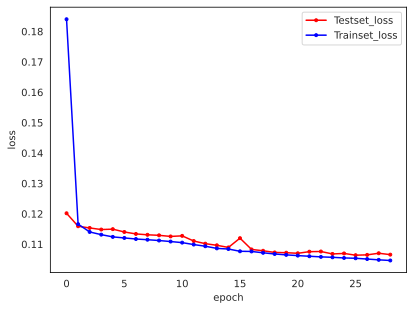

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(x_train, y_train, epochs=100, 
                              validation_data = (x_test, y_test),
                              callbacks=[early_stop])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
     

Epoch 1/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1591 - accuracy: 0.9479 - val_loss: 0.1203 - val_accuracy: 0.9589
Epoch 2/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1151 - accuracy: 0.9599 - val_loss: 0.1165 - val_accuracy: 0.9600
Epoch 3/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1125 - accuracy: 0.9604 - val_loss: 0.1142 - val_accuracy: 0.9604
Epoch 4/100
2188/2188 [==============================] - 14s 6ms/step - loss: 0.1112 - accuracy: 0.9607 - val_loss: 0.1127 - val_accuracy: 0.9606
Epoch 5/100
2188/2188 [==============================] - 5s 2ms/step - loss: 0.1097 - accuracy: 0.9607 - val_loss: 0.1116 - val_accuracy: 0.9607
Epoch 6/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1086 - accuracy: 0.9610 - val_loss: 0.1104 - val_accuracy: 0.9607
Epoch 7/100
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1074 - accuracy: 0.9614 - val_loss: 0.1093 - val_a

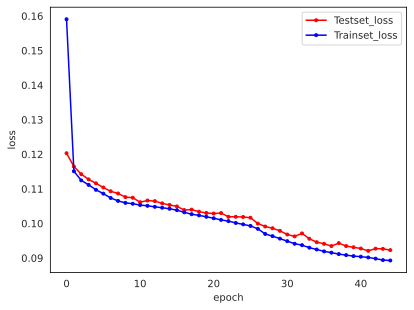

In [ ]:
from sklearn.model_selection import KFold


k=5
kfold=KFold(n_splits=k, shuffle=True)
model = Sequential()

for train_index, test_index in kfold.split(x):
  x_ktrain, x_ktest = x.iloc[train_index,:], x.iloc[test_index,:]
  y_ktrain, y_ktest = y.iloc[train_index], y.iloc[test_index]
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(x_train, y_train, epochs=100, 
                              validation_data = (x_test, y_test),
                              callbacks=[early_stop])

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
     

Epoch 1/100
2188/2188 [==============================] - 15s 5ms/step - loss: 0.2549 - accuracy: 0.9067 - val_loss: 0.1264 - val_accuracy: 0.9573
Epoch 2/100
2188/2188 [==============================] - 8s 4ms/step - loss: 0.1562 - accuracy: 0.9400 - val_loss: 0.1251 - val_accuracy: 0.9570
Epoch 3/100
2188/2188 [==============================] - 16s 7ms/step - loss: 0.1519 - accuracy: 0.9430 - val_loss: 0.1212 - val_accuracy: 0.9596
Epoch 4/100
2188/2188 [==============================] - 11s 5ms/step - loss: 0.1450 - accuracy: 0.9458 - val_loss: 0.1208 - val_accuracy: 0.9591
Epoch 5/100
2188/2188 [==============================] - 9s 4ms/step - loss: 0.1438 - accuracy: 0.9474 - val_loss: 0.1181 - val_accuracy: 0.9600
Epoch 6/100
2188/2188 [==============================] - 7s 3ms/step - loss: 0.1434 - accuracy: 0.9474 - val_loss: 0.1183 - val_accuracy: 0.9599
Epoch 7/100
2188/2188 [==============================] - 9s 4ms/step - loss: 0.1411 - accuracy: 0.9480 - val_loss: 0.1175 - val

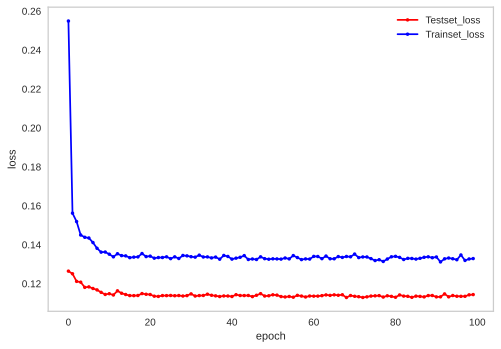

In [ ]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=200, verbose=1)
history = model.fit(x_train, y_train, epochs=100, 
                              validation_data = (x_test, y_test),
                              callbacks=[early_stop])


y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

